In [5]:
#读取 Tetuan City power consumption.csv
# DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2  Power Consumption,Zone 3  Power Consumption
# 1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.6962,16128.87538,20240.96386
# 1/1/2017 0:10,6.414,74.5,0.083,0.07,0.085,29814.68354,19375.07599,20131.08434
# 1/1/2017 0:20,6.313,74.5,0.08,0.062,0.1,29128.10127,19006.68693,19668.43373


data = []
with open('Tetuan City power consumption.csv') as f:
    for line in f:
        data.append(line.strip().split(','))
    
for i in range(1,len(data)):
    for j in range(1,len(data[i])):
        data[i][j] = float(data[i][j])

print(data[1])

['DateTime', 'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

['1/1/2017 0:00', 6.559, 73.8, 0.083, 0.051, 0.119, 34055.6962, 16128.87538, 20240.96386]



import matplotlib.pyplot as plt
import datetime
# 计算平均值用于归一化
Temperature = 0
Humidity = 0
WindSpeed = 0
generaldiffuseflows = 0
diffuseflows = 0
Zone1  = 0
Zone2 = 0
Zone3 = 0

for i in range(1, len(data)):
    Temperature += data[i][1]
    Humidity += data[i][2]
    WindSpeed += data[i][3]
    generaldiffuseflows += data[i][4]
    diffuseflows += data[i][5]
    Zone1 += data[i][6]
    Zone2 += data[i][7]
    Zone3 += data[i][8]

Temperature /= len(data)
Humidity /= len(data)
WindSpeed /= len(data)
generaldiffuseflows /= len(data)
diffuseflows /= len(data)
Zone1 /= len(data)
Zone2 /= len(data)
Zone3 /= len(data)

for i in range(1, len(data)):
    # '1/1/2017 0:00'
    Fdate = data[i][0]
    Fdate = Fdate.split(' ')
    h = Fdate[1].split(':')[0]
    m = Fdate[1].split(':')[1]
    data[i].append((int(h)*60+int(m))/10)
    Fdate = Fdate[0].split('/')
    #根据日期计算星期几
    date_object = datetime.datetime(int(Fdate[2]), int(Fdate[0]), int(Fdate[1]))
    weekday = date_object.weekday()
    data[i].append(weekday)
    del data[i][0]
    

for i in range(1, 10):
    print(data[i])

print(Temperature, Humidity, WindSpeed, generaldiffuseflows, diffuseflows, Zone1, Zone2, Zone3)



['1/1/2017 0:00', 6.559, 73.8, 0.083, 0.051, 0.119, 34055.6962, 16128.87538, 20240.96386]
[6.559, 73.8, 0.083, 0.051, 0.119, 34055.6962, 16128.87538, 20240.96386, 0.0, 6]
[6.414, 74.5, 0.083, 0.07, 0.085, 29814.68354, 19375.07599, 20131.08434, 1.0, 6]
[6.313, 74.5, 0.08, 0.062, 0.1, 29128.10127, 19006.68693, 19668.43373, 2.0, 6]
[6.121, 75.0, 0.083, 0.091, 0.096, 28228.86076, 18361.09422, 18899.27711, 3.0, 6]
[5.921, 75.7, 0.081, 0.048, 0.085, 27335.6962, 17872.34043, 18442.40964, 4.0, 6]
[5.853, 76.9, 0.081, 0.059, 0.108, 26624.81013, 17416.41337, 18130.12048, 5.0, 6]
[5.641, 77.7, 0.08, 0.048, 0.096, 25998.98734, 16993.31307, 17945.06024, 6.0, 6]
[5.496, 78.2, 0.085, 0.055, 0.093, 25446.07595, 16661.39818, 17459.27711, 7.0, 6]
[5.678, 78.1, 0.081, 0.066, 0.141, 24777.72152, 16227.35562, 17025.54217, 8.0, 6]
18.80966510864803 68.25821622756015 1.9594514756663546 182.6931283171594 75.0265905526793 32344.353493350045 21042.10763796062 17835.065958418578


In [6]:
# 导入所需的库
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso




# [5.921, 75.7, 0.081, 0.048, 0.085, 27335.6962, 17872.34043, 18442.40964, 4.0, 6]

# DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2  Power Consumption,Zone 3  Power Consumption

# 创建一个(52417, 10)的array
X = np.zeros((len(data), 9))
y = np.zeros(len(data))

for i in range(1, len(data)):
    X[i][0] = data[i][0]/Temperature
    X[i][1] = data[i][1]/Humidity
    X[i][2] = data[i][2]/WindSpeed
    X[i][3] = data[i][3]/generaldiffuseflows
    X[i][4] = data[i][4]/diffuseflows
    X[i][5] = data[i][8]
    X[i][6] = data[i][9]
    X[i][7] = data[i][7]/Zone2
    X[i][8] = data[i][6]/Zone1
    y[i] = data[i][5]/Zone3


52417

In [18]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # 添加一列全为1的向量作为偏置项
        # X.shape[0]：这是获取X的行数。shape是一个元组，表示X的维度，shape[0]是第一个维度的大小，即行数。
        
        print(X.shape)


        X = np.hstack(
            [
                np.ones((X.shape[0], 1)), X
            ]
        )
        print(X.shape)

        # 这行代码的作用是在输入矩阵X的左侧添加一列全为1的向量。这是为了处理线性回归模型中的偏置项（也称为截距项）。
        # 在线性回归模型中，我们通常假设模型的形式为y = w0 + w1*x1 + w2*x2 + ... + wn*xn，其中w0是偏置项，w1到wn是各个特征的权重，x1到xn是各个特征的值。
        # 为了方便计算，我们通常会将偏置项w0合并到权重向量中，将x0设为1，这样模型就可以写成y = w0*x0 + w1*x1 + ... + wn*xn的形式，其中x0始终为1。
        # 因此，这行代码就是在X的左侧添加一列全为1的向量，对应于x0。这样，在后续的计算中，我们就可以直接使用矩阵乘法来计算所有的wi*xi，包括偏置项。
        # 使用最小二乘法计算权重
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        # 添加一列全为1的向量作为偏置项
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        return X @ self.weights
    
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

print('MSE:', mean_squared_error(y, predictions))
print('R^2:', r2_score(y, predictions))




X = np.hstack([np.ones((X.shape[0], 1)), X])
weights = np.linalg.inv(X.T @ X) @ X.T @ y

X = np.hstack([np.ones((X.shape[0], 1)), X])
predictions = X @ weights

from sklearn.metrics import mean_squared_error, r2_score
print('MSE:', mean_squared_error(y, predictions))
print('R^2:', r2_score(y, predictions))


(52417, 9)
(52417, 10)
MSE: 0.023867019238911637
R^2: 0.8507390667539019


模型的均方误差（MSE）: 0.02
模型的决定系数（R^2）: 0.85
模型的系数: [ 0.04413168  0.05974513 -0.00695354  0.01648015  0.00240524  0.00250843
 -0.00358944  0.48259701  1.07711271]
模型的截距: 0.41965322863112564
调整后的R^2: 0.85
交叉验证的MSE: 0.03
交叉验证的R^2: 0.82


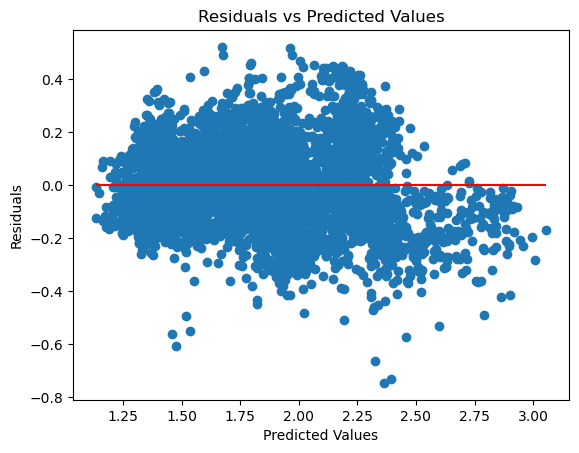

特征的标准化系数: [ 1.43053734e-01  2.62677254e-01 -5.80090633e-03  1.13829175e-02
  1.45074743e-03  6.03470126e-05 -1.79356889e-03  1.53438526e+00
  6.69439661e+00]


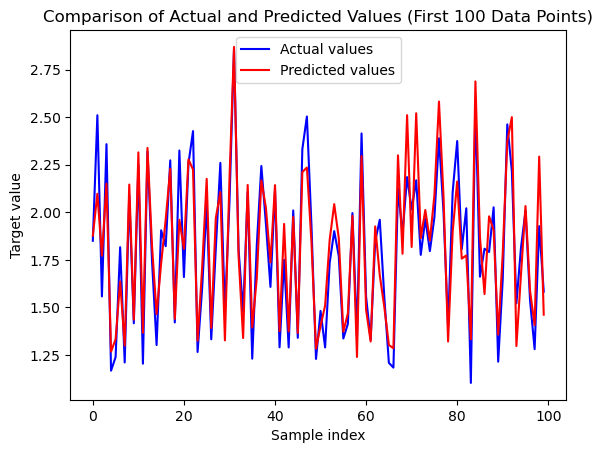

In [3]:
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 创建一个多元线性回归模型
model = LinearRegression()
# 训练模型
model.fit(X_train, y_train)
# 使用模型进行预测
y_pred = model.predict(X_test)
# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"模型的均方误差（MSE）: {mse:.2f}")
print(f"模型的决定系数（R^2）: {r2:.2f}")
# 输出模型的系数
print("模型的系数:", model.coef_)
print("模型的截距:", model.intercept_)



from sklearn.model_selection import cross_val_score
import numpy as np
import statsmodels.api as sm

# 调整R^2
def adjusted_r2(r_squared, n, p):
    return 1 - (1-r_squared) * (n-1) / (n-p-1)

n = X_train.shape[0]  # 样本数量
p = X_train.shape[1]  # 特征数量
adj_r2 = adjusted_r2(r2, n, p)
print(f"调整后的R^2: {adj_r2:.2f}")

# 交叉验证的MSE和R^2
mse_cv = -cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error').mean()
r2_cv = cross_val_score(model, X, y, cv=100, scoring='r2').mean()
print(f"交叉验证的MSE: {mse_cv:.2f}")
print(f"交叉验证的R^2: {r2_cv:.2f}")

# 残差分析
residuals = y_test - y_pred
# 残差的简单可视化
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# 特征的标准化系数
# 首先确保X_train是标准化的，如果不是，请先进行标准化处理
standardized_coefs = model.coef_ / np.std(X_train, axis=0)
print("特征的标准化系数:", standardized_coefs)


import matplotlib.pyplot as plt

# 确定展示数据的数量，最多100个数据点
num_points = min(100, len(y_test))

# 绘制测试集的实际值的前100个数据点
plt.plot(range(num_points), y_test[:num_points], color='blue', label='Actual values')

# 绘制模型预测值的前100个数据点
plt.plot(range(num_points), y_pred[:num_points], color='red', label='Predicted values')

# 添加图例
plt.legend()

# 添加图表标题和轴标签
plt.title('Comparison of Actual and Predicted Values (First 100 Data Points)')
plt.xlabel('Sample index')
plt.ylabel('Target value')

# 显示图表
plt.show()


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[array([[1.],
        [1.],
        [1.]]),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])]